<a href="https://colab.research.google.com/github/NguyenHoang127/AI_Exercise_All/blob/main/AI_Final_Doan_Nguyen_Hoang_20146195.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Khai báo thư viện

#1.Thư viện tính toán và hiển thị 
import matplotlib.pyplot as plt
import numpy as np

#2.Thư viện xử lý hình 3 chiều thành dữ liệu dưới dạng số
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
from keras.utils import to_categorical
from skimage.transform import resize

In [ ]:
folder = '/content/drive/MyDrive/DATA_AI_FINAL'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('N0 '):  #Chữ số
    output= 0.0
  if file.startswith('N1 '):
    output= 1.0
  if file.startswith('N2 '):
    output= 2.0
  if file.startswith('N3 '):
    output= 3.0
  if file.startswith('N4 '):
    output= 4.0
  if file.startswith('N5 '):
    output= 5.0
  if file.startswith('N6 '):
    output= 6.0
  if file.startswith('N7 '):
    output= 7.0
  if file.startswith('N8 '):
    output= 8.0
  if file.startswith('N9 '):
    output= 9.0
  if file.startswith('A '):
    output= 10.0
  if file.startswith('B '):
    output= 11.0
  if file.startswith('C '):
    output= 12.0
  if file.startswith('D '):
    output= 13.0
  if file.startswith('E '):
    output= 14.0
  if file.startswith('F '):
    output= 15.0
  if file.startswith('G '):
    output= 16.0
  if file.startswith('H '):
    output= 17.0
  if file.startswith('I '):
    output= 18.0
  if file.startswith('J '):
    output= 19.0
  if file.startswith('K '):
    output= 20.0
  if file.startswith('L '):
    output= 21.0
  if file.startswith('M '):
    output= 22.0
  if file.startswith('NN '):
    output= 23.0
  if file.startswith('O '):
    output= 24.0
  if file.startswith('P '):
    output= 25.0
  if file.startswith('Q '):
    output= 26.0
  if file.startswith('R '):
    output= 27.0
  if file.startswith('S '):
    output= 28.0
  if file.startswith('T '):
    output= 29.0
  if file.startswith('U '):
    output= 30.0
  if file.startswith('V '):
    output= 31.0
  if file.startswith('W '):
    output= 32.0
  if file.startswith('X '):
    output= 33.0
  if file.startswith('Y '):
    output= 34.0
  if file.startswith('Z '):
    output= 35.0


  photo = load_img(folder + '/' + file, target_size= (28,28))
  photo= img_to_array(photo)
  photo = resize(photo, (28, 28, 1))

  photos.append(photo)
  labels.append(output)

photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)

save('/content/drive/MyDrive/Result_AI/character_photos2.npy', photos)
save('/content/drive/MyDrive/Result_AI/character_labels2.npy', labels)

(36132, 28, 28, 1) (36132,)


In [ ]:
# Khởi tạo và sử dụng dữ liệu đã tạo
photos = np.load('/content/drive/MyDrive/Result_AI/character_photos2.npy')
labels = np.load('/content/drive/MyDrive/Result_AI/character_labels2.npy')

# Preprocess data
photos = photos.astype('float32') / 255.0
labels = to_categorical(labels)

print(photos.shape, labels.shape)
# Chia ra thành 2 phần để test và train

test_x, test_y = photos[:150], labels[:150]
train_x, train_y = photos[150:], labels[150:]

(36132, 28, 28, 1) (36132, 36)


In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization
from keras.layers.activation import LeakyReLU
from keras.optimizers import Adam
from keras import losses
from keras.losses import categorical_crossentropy

In [ ]:
model = Sequential()


model = Sequential()

model.add(Conv2D(32, kernel_size= (5,5), activation= 'relu', input_shape= (28,28, 1), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (5,5), activation= 'relu', padding= 'valid'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Flatten())
model.add(Dense(256, activation= 'relu'))
model.add(Dense(84, activation= 'relu'))
model.add(Dense(36, activation= 'softmax'))
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [ ]:
#Biên dịch chương trình
from keras.backend import categorical_crossentropy
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Augment data with ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
datagen.fit(train_x)

# Train model
history = model.fit(datagen.flow(train_x, train_y, batch_size=32), epochs=70, validation_data=(test_x, test_y))

# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

Epoch 1/70
1125/1125 [==============================] - 19s 14ms/step - loss: 2.1108 - accuracy: 0.4001 - val_loss: 1.3416 - val_accuracy: 0.6333
Epoch 2/70
1125/1125 [==============================] - 15s 14ms/step - loss: 1.3354 - accuracy: 0.6214 - val_loss: 0.9587 - val_accuracy: 0.7667
Epoch 3/70
1125/1125 [==============================] - 17s 16ms/step - loss: 1.1592 - accuracy: 0.6705 - val_loss: 1.2127 - val_accuracy: 0.6733
Epoch 4/70
1125/1125 [==============================] - 16s 14ms/step - loss: 1.0605 - accuracy: 0.7019 - val_loss: 0.7858 - val_accuracy: 0.8333
Epoch 5/70
1125/1125 [==============================] - 15s 14ms/step - loss: 1.0012 - accuracy: 0.7193 - val_loss: 0.8426 - val_accuracy: 0.8200
Epoch 6/70
1125/1125 [==============================] - 15s 14ms/step - loss: 0.9605 - accuracy: 0.7281 - val_loss: 0.7347 - val_accuracy: 0.8133
Epoch 7/70
1125/1125 [==============================] - 16s 14ms/step - loss: 0.9166 - accuracy: 0.7405 - val_loss: 1.0130 -

Test loss: 0.5937511920928955
Test accunacy 0.8399999737739563


Text(0.5, 1.0, 'Training & Testing Accuracy')

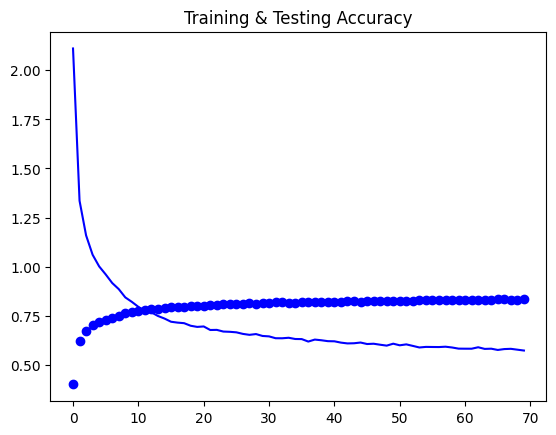

In [ ]:
import matplotlib.pyplot as plt

eval = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', eval[0])
print('Test accunacy', eval[1])

accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'bo', label = 'Traning Accuracy')
plt.plot(epochs, loss, 'b', label= 'Test Accuracy')
plt.title('Training & Testing Accuracy')

In [ ]:
model.save('/content/drive/MyDrive/Result_AI/character_model2.h5')

1/1 [==============================] - 0s 18ms/step
N


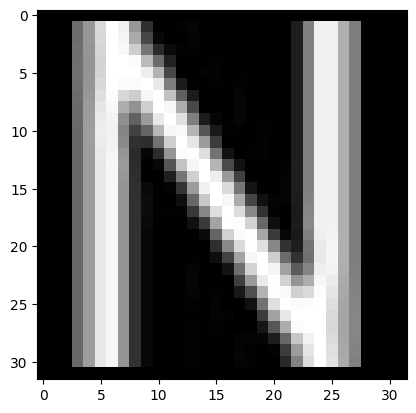

1/1 [==============================] - 0s 19ms/step
6


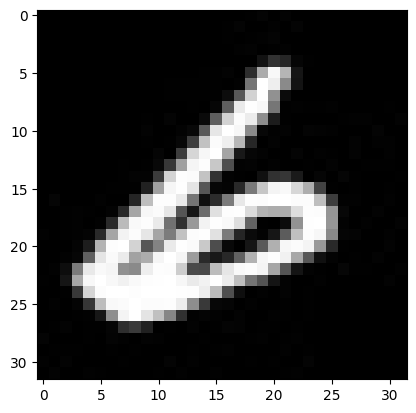

1/1 [==============================] - 0s 19ms/step
S


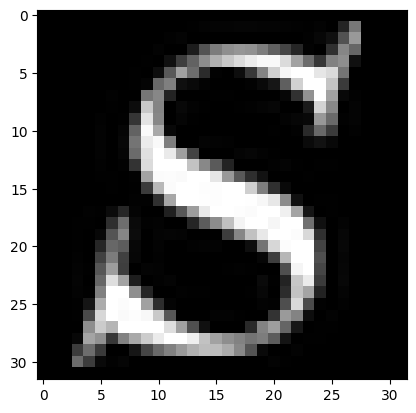

In [ ]:
#Testing
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array

folder = '/content/drive/MyDrive/Testing_AI'
for file in listdir(folder):
  photo = load_img(folder + '/' +  file)
  plt.imshow(photo)
  photo = load_img(folder + '/' +  file, target_size = (28,28))
  photo=img_to_array(photo)
  photo = resize(photo, (28, 28, 1))
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  
  class_name=['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
  print(class_name[result])
  plt.show()